# Shrey Viradiya
### 18BCE259

# Decision Tree using sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Data

In [2]:
X, y = load_iris(return_X_y= True)
X, y = shuffle(X, y, random_state = 259)
class_names, feature_names = load_iris()['target_names'], load_iris()['feature_names']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=259)

## Classification Report Function

In [4]:
def Report(clf, prediction, y_true, class_names, feature_names):
    print("Prediction Report: ")
    print("===================")

    print("Accuracy: ", metrics.accuracy_score(y_true, prediction))
    print(metrics.classification_report(y_true, prediction, target_names = class_names))
    print(metrics.confusion_matrix(y_true, prediction))

    plt.figure(figsize=(16,20))
    tree.plot_tree(clf, feature_names = feature_names, class_names= class_names, filled=True)

## ID3

In [5]:
id3 = tree.DecisionTreeClassifier(criterion='entropy')
id3.__name__ = 'id3'
id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion=&#39;entropy&#39;)

In [6]:
prediction_id3 = id3.predict(X_test)

Prediction Report: 
Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 15  1]
 [ 0  2 12]]


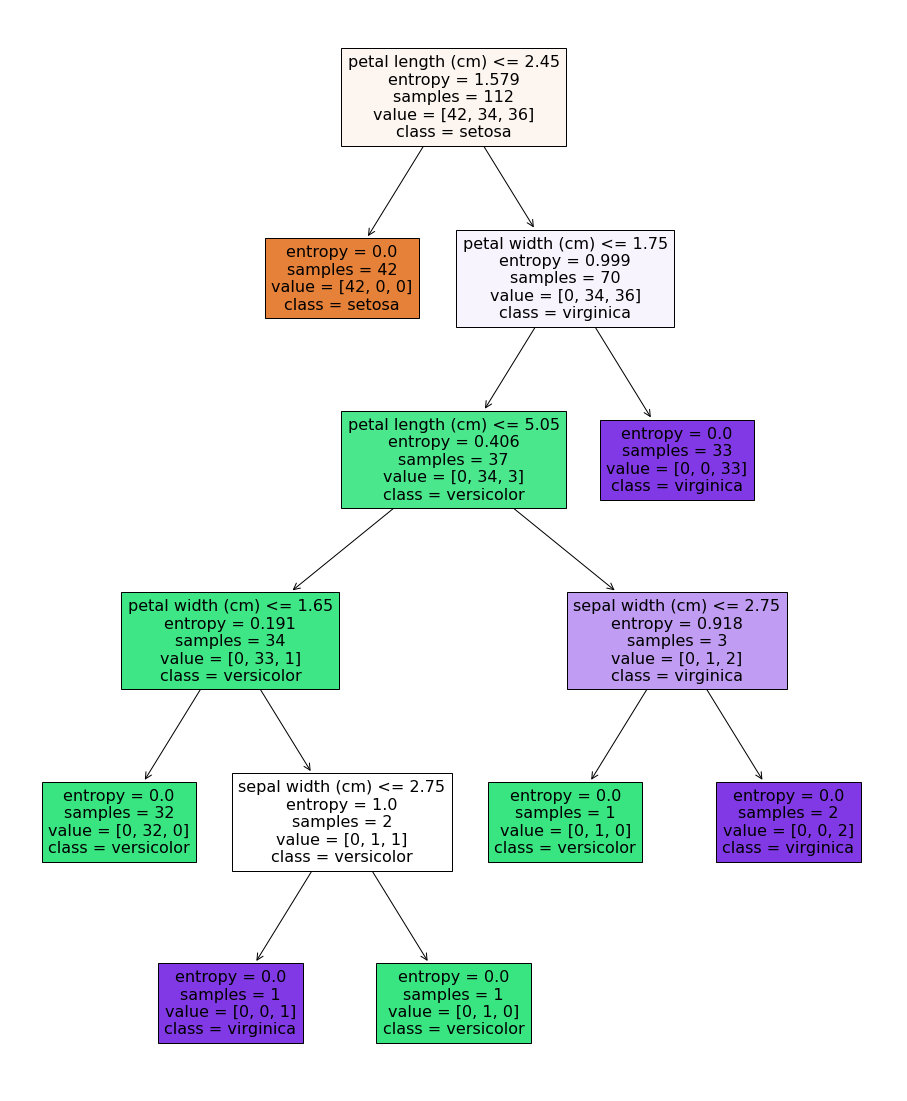

In [7]:
Report(id3, prediction_id3, y_test, class_names, feature_names)

## CART

In [8]:
cart = tree.DecisionTreeClassifier()
cart.__name__ = 'cart'
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
prediction_cart = cart.predict(X_test)

Prediction Report: 
Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 15  1]
 [ 0  2 12]]


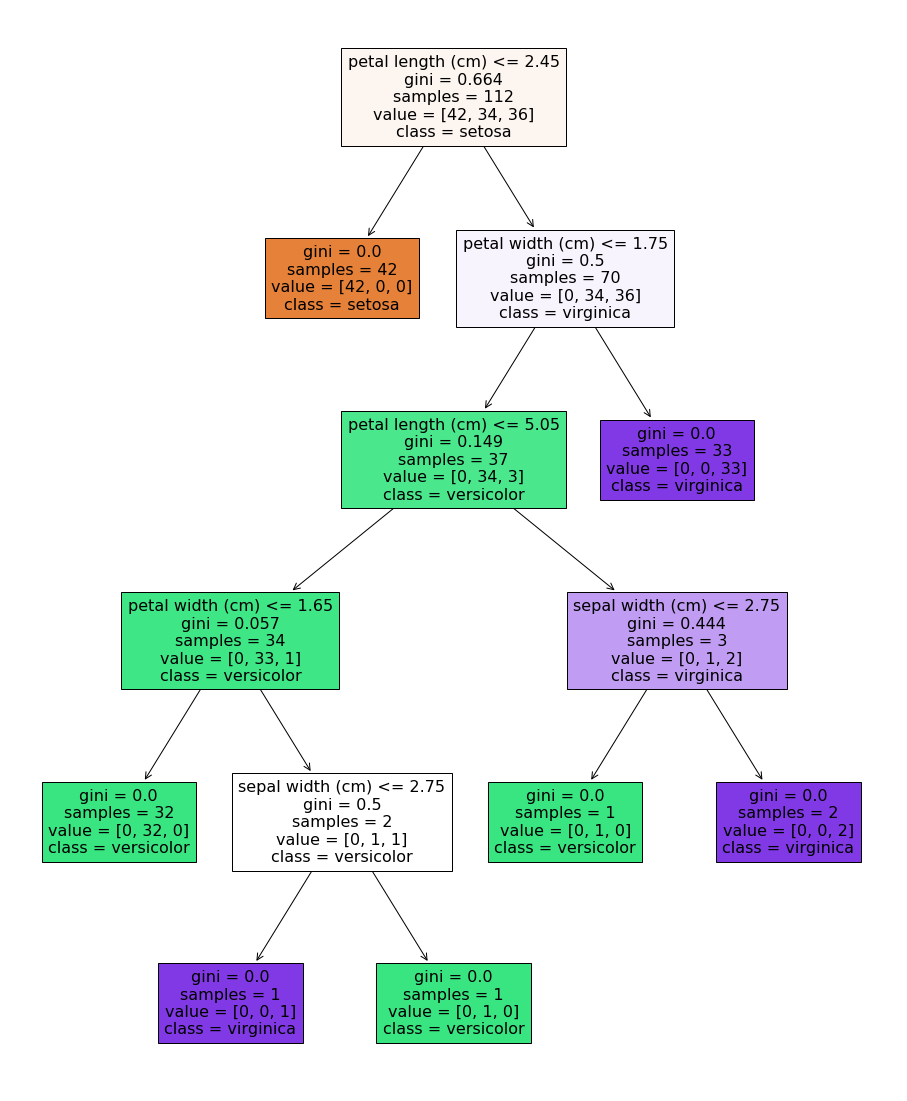

In [10]:
Report(cart, prediction_cart, y_test, class_names, feature_names)